Install the necessary libraries

In [3]:
%%capture
!pip install PyTDC mols2grid 

In [4]:
from rdkit import Chem
from tdc.single_pred import ADME
import mols2grid
from rdkit.Chem.Draw import MolsToGridImage
import useful_rdkit_utils as uru
import pandas as pd

Instantiate a REOS object

In [5]:
reos = uru.REOS()

Get the path to the rules file

In [6]:
rule_path = reos.get_rule_file_location()
rule_path

PosixPath('/Users/pwalters/.data/useful_rdkit_utils/data/alert_collection.csv')

Get the number of entries in the rules file

In [7]:
reos.rule_df.shape

(1251, 8)

Get a list of available rule sets

In [8]:
reos.get_available_rule_sets()

array(['Glaxo', 'Dundee', 'BMS', 'PAINS', 'SureChEMBL', 'MLSMR',
       'Inpharmatica', 'LINT'], dtype=object)

Get the currently active rule sets

In [9]:
reos.get_active_rule_sets()

array(['Glaxo'], dtype=object)

Get the number of active rules

In [10]:
reos.active_rule_df.shape

(55, 8)

Set new active rule sets

In [11]:
reos.set_active_rule_sets(['BMS','PAINS'])

Get the new active rule sets

In [12]:
reos.get_active_rule_sets()

array(['BMS', 'PAINS'], dtype=object)

See how many rules are active

In [13]:
reos.active_rule_df.shape

(661, 8)

Read rules from a file

In [14]:
reos.read_rules(rule_path,['Glaxo'])

See how many rules are active

In [15]:
reos.active_rule_df.shape

(55, 8)

Get the active rule dataframe

In [16]:
reos.active_rule_df

,rule_id,rule_set,description,smarts,rule_set_name,priority,max,pat
0,1,1,R1 Reactive alkyl halides,"[Br,Cl,I][CX4;CH,CH2]",Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x36b95ac70>
1,2,1,R2 Acid halides,"[S,C](=[O,S])[F,Br,Cl,I]",Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x36b93eea0>
2,3,1,R3 Carbazides,O=CN=[N+]=[N-],Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x36b95a3b0>
3,4,1,R4 Sulphate esters,"COS(=O)O[C,c]",Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x36b95a6c0>
4,5,1,R5 Sulphonates,"COS(=O)(=O)[C,c]",Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x36b95be60>
5,6,1,R6 Acid anhydrides,C(=O)OC(=O),Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x36b959850>
6,7,1,R7 Peroxides,OO,Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x36b959930>
7,8,1,R8 Pentafluorophenyl esters,C(=O)Oc1c(F)c(F)c(F)c(F)c1(F),Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x36b95b060>
8,9,1,R9 Paranitrophenyl esters,C(=O)Oc1ccc(N(=O)~[OX1])cc1,Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x36b958dd0>
9,10,1,R10 esters of HOBT,C(=O)Onnn,Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x36b959540>


Evaluate a SMILES

In [17]:
gleevec_smiles = "Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C"
reos.process_smiles(gleevec_smiles)

('ok', 'ok')

Evaluate a molecule

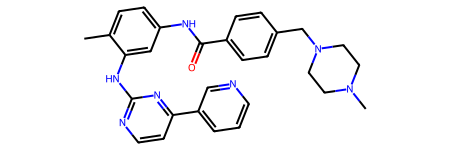

In [18]:
gleevec_mol = Chem.MolFromSmiles(gleevec_smiles)
gleevec_mol

In [19]:
reos.process_mol(gleevec_mol)

('ok', 'ok')

Get human intestinal absorption (HIA) data from the [Therapeutic Data Commons (TDC)](https://tdcommons.ai/).

In [20]:
hia_data = ADME(name = 'HIA_Hou').get_data()

Downloading...
100%|█████████████████████████████████████| 40.1k/40.1k [00:00<00:00, 24.9MiB/s]
Loading...
Done!


In [21]:
hia_data.head()

,Drug_ID,Drug,Y
0,Acetanilide,CC(=O)Nc1ccccc1,1
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1
2,Alfacalcidol,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1


Use Pandas apply to evaluate all of the SMILES in the dataframe

In [22]:
hia_data[['rule_set_name','reos']] = hia_data.Drug.apply(reos.process_smiles).to_list()

In [23]:
hia_data

,Drug_ID,Drug,Y,rule_set_name,reos
0,Acetanilide,CC(=O)Nc1ccccc1,1,ok,ok
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,ok,ok
2,Alfacalcidol,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1,ok,ok
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,ok,ok
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1,ok,ok
...,...,...,...,...,...
573,Tiludronic_acid,O=P(O)(O)C(Cc1ccc(Cl)cc1)P(=O)(O)O,0,ok,ok
574,Zanamivir.mol,CC(=O)N[C@H]1[C@@H]([C@@H](O)[C@H](O)CO)OC(C(=...,0,ok,ok
575,Kanamycin.mol,CC(=O)NC[C@@H]1O[C@@H](O[C@H]2[C@@H](N)C[C@H](...,0,ok,ok
576,Amikacin.mol,NCC[C@@H](O)C(=O)N[C@@H]1C[C@H](N)[C@H](O[C@@H...,0,ok,ok


View summary stats

In [24]:
hia_data[['rule_set_name','reos']].value_counts()

rule_set_name  reos                                     
ok             ok                                           526
Glaxo          I16 Betalactams                               19
               R1 Reactive alkyl halides                      9
               I11 Benzylic quaternary Nitrogen               5
               R17 acylhydrazide                              5
               N2 Polyenes                                    4
               I6 Epoxides, Thioepoxides, Aziridines          3
               N5 Cycloheximide derivatives                   3
               I2 Compounds with 4 or more acidic groups      1
               I4 Disulphides                                 1
               N1 Quinones                                    1
               N3 Saponin derivatives                         1
Name: count, dtype: int64

Browse the results with [mols2grid](https://github.com/cbouy/mols2grid)

In [25]:
mols2grid.display(hia_data.sort_values(["rule_set_name","reos"]).query("reos != 'ok'"),
                  smiles_col="Drug",subset=["img","Drug_ID","reos","rule_set_name"])

MolGridWidget()

We can also get REOS data as a Pandas dataframe.  To look at this, let's first reload the HIA data. 

In [26]:
hia_data = ADME(name = 'HIA_Hou').get_data()

Found local copy...
Loading...
Done!


In [27]:
hia_data

,Drug_ID,Drug,Y
0,Acetanilide,CC(=O)Nc1ccccc1,1
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1
2,Alfacalcidol,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1
...,...,...,...
573,Tiludronic_acid,O=P(O)(O)C(Cc1ccc(Cl)cc1)P(=O)(O)O,0
574,Zanamivir.mol,CC(=O)N[C@H]1[C@@H]([C@@H](O)[C@H](O)CO)OC(C(=...,0
575,Kanamycin.mol,CC(=O)NC[C@@H]1O[C@@H](O[C@H]2[C@@H](N)C[C@H](...,0
576,Amikacin.mol,NCC[C@@H](O)C(=O)N[C@@H]1C[C@H](N)[C@H](O[C@@H...,0


We can the call the **pandas_smiles** method to calculate REOS for a list of SMILES.  

In [28]:
reos_results = reos.pandas_smiles(hia_data.Drug)

  0%|          | 0/578 [00:00<?, ?it/s]

Let's look at the molecules that triggered an alert

In [29]:
combo_df = pd.concat([hia_data,reos_results],axis=1)
combo_df.query("description != 'ok'").head()

,Drug_ID,Drug,Y,rule_set_name,description
17,Carmustine,O=NN(CCCl)C(=O)NCCCl,1,Glaxo,R1 Reactive alkyl halides
89,Phenglutarimide,CCN(CC)CC[C@]1(c2ccccc2)CCC(=O)NC1=O,1,Glaxo,N5 Cycloheximide derivatives
114,Toremifene.mol,CN(C)CCOc1ccc(C(=C(CCCl)c2ccccc2)c2ccccc2)cc1,1,Glaxo,R1 Reactive alkyl halides
118,Trofosfamide,O=[P@@]1(N(CCCl)CCCl)OCCCN1CCCl,1,Glaxo,R1 Reactive alkyl halides
176,Cephradine.mol,CC1=C(C(=O)O)N2C(=O)[C@H](NC(=O)[C@@H](N)C3=CC...,1,Glaxo,I16 Betalactams


We can use the **pandas_mols** method to perfrom a similar function with a set of RDKit molecules. 

In [30]:
hia_data['mol'] = hia_data.Drug.apply(Chem.MolFromSmiles)

In [31]:
reos.pandas_mols(hia_data.mol)

  0%|          | 0/578 [00:00<?, ?it/s]

,rule_set_name,description
0,ok,ok
1,ok,ok
2,ok,ok
3,ok,ok
4,ok,ok
...,...,...
573,ok,ok
574,ok,ok
575,ok,ok
576,ok,ok


The **reos_smiles** and **reos_mols** method will return a **None** for SMILES or molecules where parsing failed.  We can use dropna to drop these molecules.  Here's an example. 

In [32]:
test_df = pd.DataFrame({"SMILES": ["CCC","xxxx","c1ccccn1"], "Name": ["butane","junk","pyridine"]})
test_df

,SMILES,Name
0,CCC,butane
1,xxxx,junk
2,c1ccccn1,pyridine


In [33]:
test_reos = reos.pandas_smiles(test_df.SMILES)

  0%|          | 0/3 [00:00<?, ?it/s]

Error parsing SMILES xxxx


[08:52:30] SMILES Parse Error: syntax error while parsing: xxxx
[08:52:30] SMILES Parse Error: Failed parsing SMILES 'xxxx' for input: 'xxxx'


Combine the REOS result with the original dataframe

In [34]:
test_combo_df = pd.concat([test_df,test_reos],axis=1)
test_combo_df

,SMILES,Name,rule_set_name,description
0,CCC,butane,ok,ok
1,xxxx,junk,None,None
2,c1ccccn1,pyridine,ok,ok


Drop the bad row

In [35]:
test_combo_df.dropna()

,SMILES,Name,rule_set_name,description
0,CCC,butane,ok,ok
2,c1ccccn1,pyridine,ok,ok


A couple of settings to improve the RDKit rendering quality

In [36]:
uru.rd_make_structures_pretty()
uru.rd_enable_svg()

We can't (yet) highlight the matches with mols2grid, but we can do this with the RDKit's [MolsToGridImage](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html).

In [37]:
hia_data

,Drug_ID,Drug,Y,mol
0,Acetanilide,CC(=O)Nc1ccccc1,1,<rdkit.Chem.rdchem.Mol object at 0x36c868900>
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,<rdkit.Chem.rdchem.Mol object at 0x36c868200>
2,Alfacalcidol,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1,<rdkit.Chem.rdchem.Mol object at 0x36c868430>
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,<rdkit.Chem.rdchem.Mol object at 0x36c868660>
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1,<rdkit.Chem.rdchem.Mol object at 0x36c8685f0>
...,...,...,...,...
573,Tiludronic_acid,O=P(O)(O)C(Cc1ccc(Cl)cc1)P(=O)(O)O,0,<rdkit.Chem.rdchem.Mol object at 0x36c884270>
574,Zanamivir.mol,CC(=O)N[C@H]1[C@@H]([C@@H](O)[C@H](O)CO)OC(C(=...,0,<rdkit.Chem.rdchem.Mol object at 0x36c8842e0>
575,Kanamycin.mol,CC(=O)NC[C@@H]1O[C@@H](O[C@H]2[C@@H](N)C[C@H](...,0,<rdkit.Chem.rdchem.Mol object at 0x36c884350>
576,Amikacin.mol,NCC[C@@H](O)C(=O)N[C@@H]1C[C@H](N)[C@H](O[C@@H...,0,<rdkit.Chem.rdchem.Mol object at 0x36c8843c0>


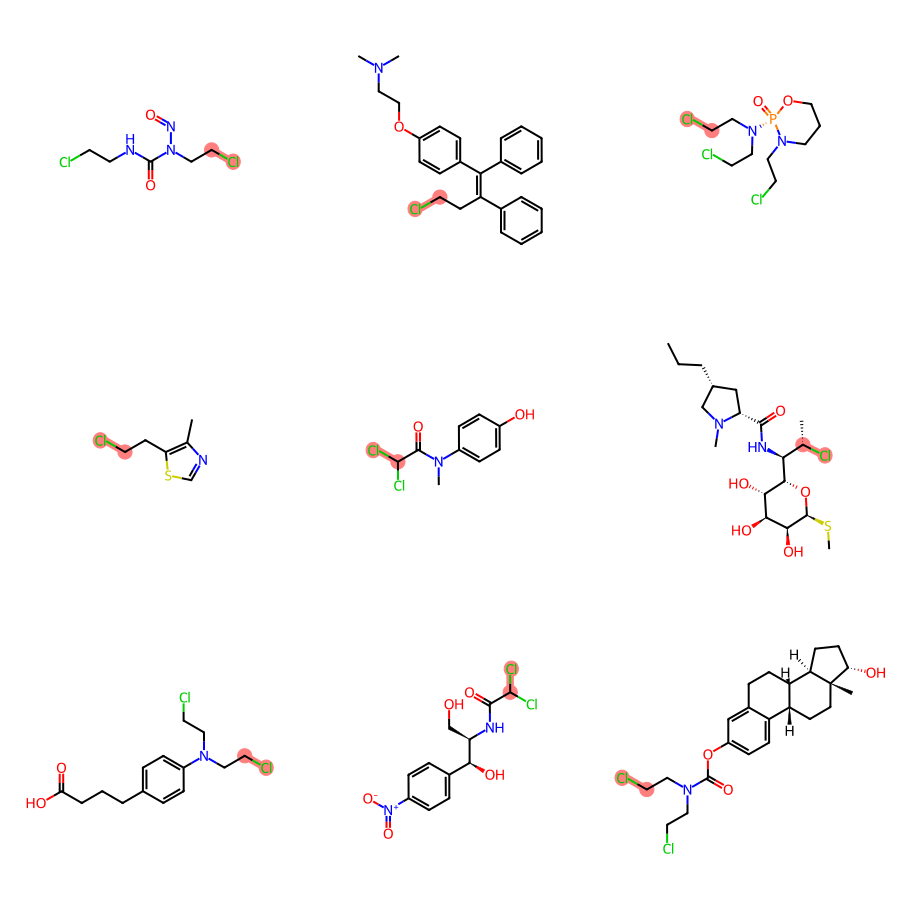

In [38]:
rule_set = "Glaxo"
rule_name = 'R1 Reactive alkyl halides'
query = reos.active_rule_df.query("rule_set_name == @rule_set and description == @rule_name").pat.values
img = None
if len(query) != 1:
    print(f"no query match for {rule_set}/{rule_name}")
else:
    query = query[0]
    smiles_list = combo_df.query("rule_set_name == @rule_set and description == @rule_name").Drug
    mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
    match_list = [x.GetSubstructMatch(query) for x in mol_list]
    img = MolsToGridImage(mol_list,molsPerRow=3,highlightAtomLists=match_list,subImgSize=(300, 300))
img

Let's add some Rule of 5 properties to the dataframe.  First, we'll instantiate an Ro5Calculator.

In [39]:
ro5_calc = uru.Ro5Calculator()

Next add the properties to the dataframe.

In [40]:
hia_data[ro5_calc.names] = hia_data.Drug.apply(ro5_calc.calc_smiles).to_list()

In [41]:
hia_data

,Drug_ID,Drug,Y,mol,MolWt,LogP,HBD,HBA,TPSA
0,Acetanilide,CC(=O)Nc1ccccc1,1,<rdkit.Chem.rdchem.Mol object at 0x36c868900>,135.166,1.64500,1.0,1.0,29.10
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,<rdkit.Chem.rdchem.Mol object at 0x36c868200>,222.251,-0.85610,2.0,6.0,115.04
2,Alfacalcidol,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1,<rdkit.Chem.rdchem.Mol object at 0x36c868430>,400.647,6.58980,2.0,2.0,40.46
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,<rdkit.Chem.rdchem.Mol object at 0x36c868660>,230.315,1.66969,1.0,4.0,36.95
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1,<rdkit.Chem.rdchem.Mol object at 0x36c8685f0>,380.466,1.35302,3.0,6.0,110.88
...,...,...,...,...,...,...,...,...,...
573,Tiludronic_acid,O=P(O)(O)C(Cc1ccc(Cl)cc1)P(=O)(O)O,0,<rdkit.Chem.rdchem.Mol object at 0x36c884270>,300.571,1.56400,4.0,2.0,115.06
574,Zanamivir.mol,CC(=O)N[C@H]1[C@@H]([C@@H](O)[C@H](O)CO)OC(C(=...,0,<rdkit.Chem.rdchem.Mol object at 0x36c8842e0>,332.313,-3.57583,8.0,7.0,198.22
575,Kanamycin.mol,CC(=O)NC[C@@H]1O[C@@H](O[C@H]2[C@@H](N)C[C@H](...,0,<rdkit.Chem.rdchem.Mol object at 0x36c884350>,526.540,-7.11400,11.0,15.0,285.69
576,Amikacin.mol,NCC[C@@H](O)C(=O)N[C@@H]1C[C@H](N)[C@H](O[C@@H...,0,<rdkit.Chem.rdchem.Mol object at 0x36c8843c0>,585.608,-8.42420,13.0,17.0,331.94


With this in hand, we can define a query to select the molecules that pass our functional group filters and meet a set of property criteria. 

In [42]:
criteria_query = """MolWt <= 500 and LogP <= 5 and HBD <= 5 and HBA <= 10 and TPSA <= 140"""

In [43]:
hia_data.query(criteria_query)

,Drug_ID,Drug,Y,mol,MolWt,LogP,HBD,HBA,TPSA
0,Acetanilide,CC(=O)Nc1ccccc1,1,<rdkit.Chem.rdchem.Mol object at 0x36c868900>,135.166,1.64500,1.0,1.0,29.10
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,<rdkit.Chem.rdchem.Mol object at 0x36c868200>,222.251,-0.85610,2.0,6.0,115.04
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,<rdkit.Chem.rdchem.Mol object at 0x36c868660>,230.315,1.66969,1.0,4.0,36.95
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1,<rdkit.Chem.rdchem.Mol object at 0x36c8685f0>,380.466,1.35302,3.0,6.0,110.88
5,Anastrozole.mol,CC(C)(C#N)c1cc(Cn2cncn2)cc(C(C)(C)C#N)c1,1,<rdkit.Chem.rdchem.Mol object at 0x36c8686d0>,293.374,2.92876,0.0,5.0,78.29
...,...,...,...,...,...,...,...,...,...
568,Hydrochlorothiazide.mol,NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O,1,<rdkit.Chem.rdchem.Mol object at 0x36c884040>,297.745,-0.35130,3.0,5.0,118.36
569,Metolazone.mol,Cc1ccccc1N1C(=O)c2cc(S(N)(=O)=O)c(Cl)cc2N[C@@H]1C,1,<rdkit.Chem.rdchem.Mol object at 0x36c8840b0>,365.842,2.71412,2.0,4.0,92.50
570,Reproterol,Cn1c(=O)c2c(ncn2CCCNC[C@@H](O)c2cc(O)cc(O)c2)n...,1,<rdkit.Chem.rdchem.Mol object at 0x36c884120>,389.412,-0.44180,4.0,10.0,134.54
571,Tranexamic_acid.mol,NC[C@H]1CC[C@@H](C(=O)O)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x36c884190>,157.213,0.83610,2.0,2.0,63.32
